# Level 1

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('retail_sales.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [4]:
df.shape

(1000, 9)

##### WE have One thousand Rows and Nine Columns

In [5]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [7]:
df.select_dtypes(include='int')

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100
...,...,...,...,...,...
995,996,62,1,50,50
996,997,52,3,30,90
997,998,23,4,25,100
998,999,36,3,50,150


In [8]:
df.select_dtypes(include='object')

,Date,Customer ID,Gender,Product Category
0,2023-11-24,CUST001,Male,Beauty
1,2023-02-27,CUST002,Female,Clothing
2,2023-01-13,CUST003,Male,Electronics
3,2023-05-21,CUST004,Male,Clothing
4,2023-05-06,CUST005,Male,Beauty
...,...,...,...,...
995,2023-05-16,CUST996,Male,Clothing
996,2023-11-17,CUST997,Male,Beauty
997,2023-10-29,CUST998,Female,Beauty
998,2023-12-05,CUST999,Female,Electronics


##### Total 4 string columns and 5 interger columns 

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
num1 = df.select_dtypes(include='int')
num1.corr()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


In [11]:
product = df['Product Category'].value_counts()
product

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Text(0.5, 1.0, 'Sales Percentage Of Products')

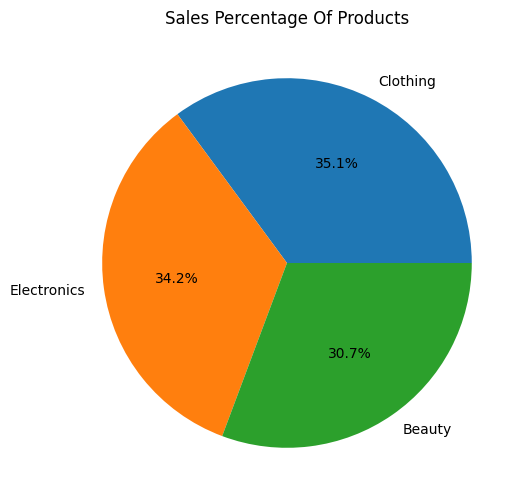

In [12]:
plt.figure(figsize=(8,6))
plt.pie(product, labels=product.index, autopct='%1.1f%%')
plt.title('Sales Percentage Of Products')

In [13]:
gender_col = df['Gender'].value_counts()
gender_col

Gender
Female    510
Male      490
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

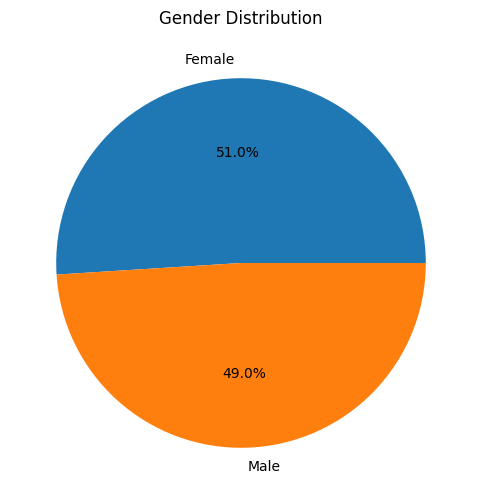

In [14]:
plt.figure(figsize=(8,6))
plt.pie(gender_col, labels=gender_col.index,autopct='%1.1f%%')
plt.title('Gender Distribution')

In [15]:
avg_age = df['Age'].mean()
avg_age

np.float64(41.392)

In [16]:
avg_age_male = df[df['Gender']=='Male']['Age'].mean()
avg_age_male

np.float64(41.42857142857143)

In [17]:
avg_age_fmale = df[df['Gender']=='Female']['Age'].mean()
avg_age_fmale

np.float64(41.35686274509804)

In [18]:
avg_gender_age = pd.DataFrame({'Category': ['Male','Female'],
              'Average_Age':[41.43, 41.36] })

Text(0.5, 1.0, 'Average Age by Gender')

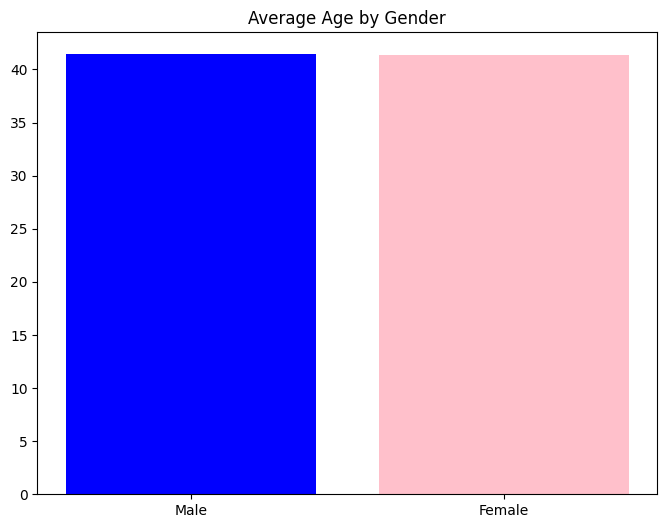

In [19]:
plt.figure(figsize=(8,6))
plt.bar(avg_gender_age['Category'], avg_gender_age['Average_Age'], color=['blue', 'pink'])
plt.title('Average Age by Gender')

In [20]:
sorted_df = df.sort_values(by='Date')
sorted_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [21]:
sorted_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30


In [56]:
sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])

In [57]:
sorted_df['Year'] = sorted_df['Date'].dt.year
sorted_df['Month_Abbr'] = sorted_df['Date'].dt.strftime('%b') 

In [58]:
sorted_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_Abbr
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,Jan
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,Jan
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,Jan
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,Jan
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,Dec
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,Dec
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,Dec
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,Jan


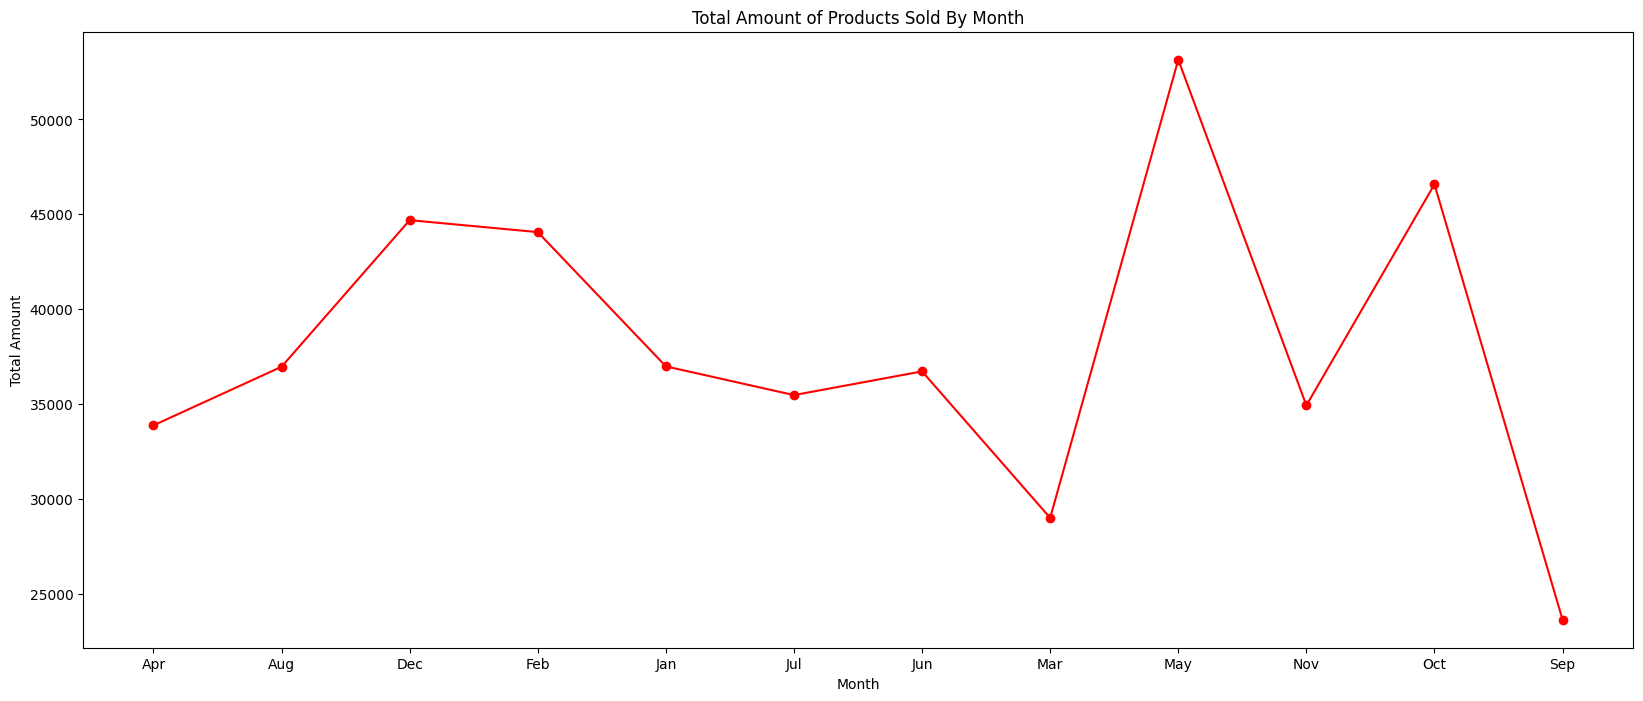

In [59]:
mothly_trend = sorted_df.groupby('Month_Abbr')['Total Amount'].sum()
plt.figure(figsize=(20,8))
plt.plot(mothly_trend, marker='o', linestyle='-', color='red')
plt.title('Total Amount of Products Sold By Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

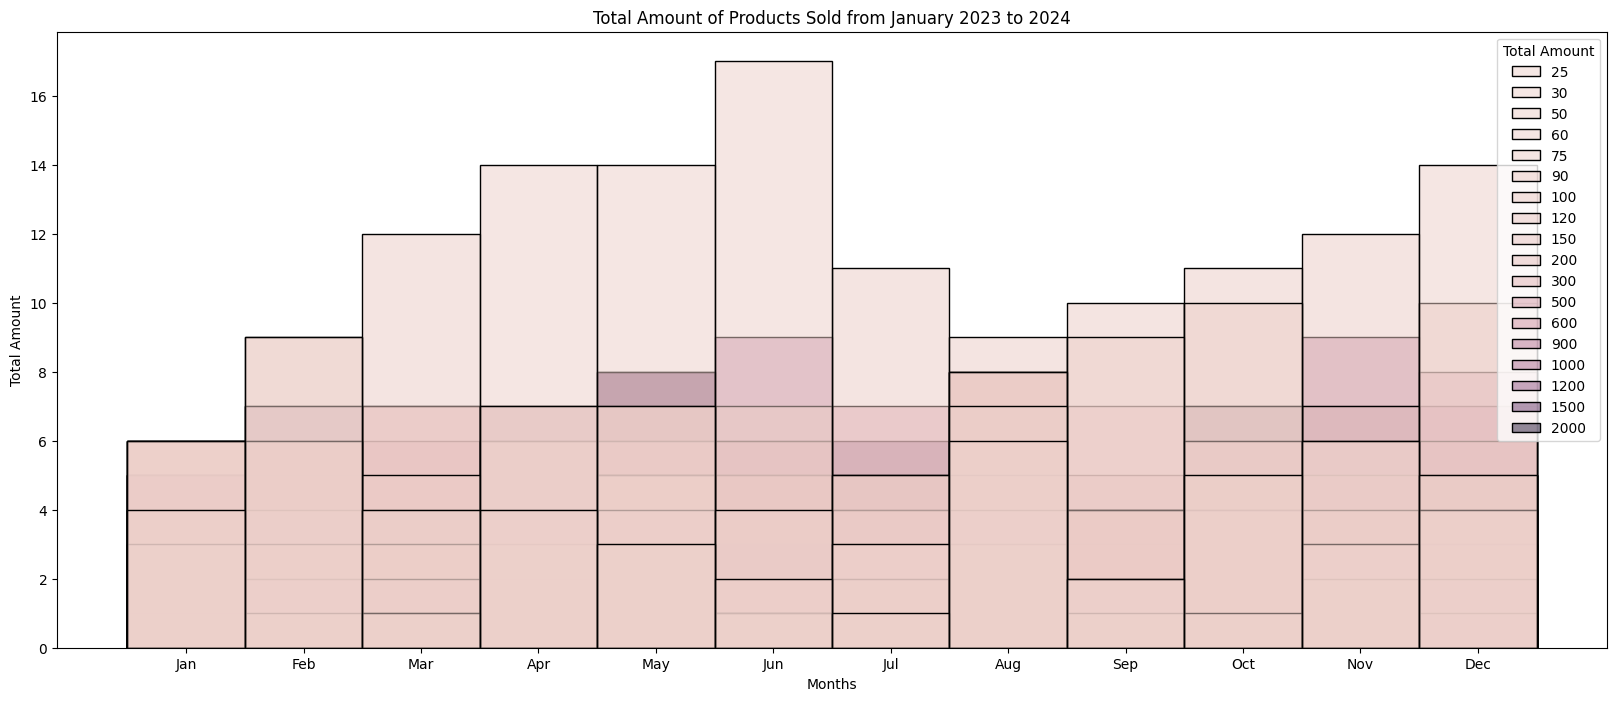

In [60]:
plt.figure(figsize=(20,8))
sns.histplot(x=sorted_df['Month_Abbr'], hue= sorted_df['Total Amount'], bins=12)
plt.title('Total Amount of Products Sold from January 2023 to 2024')
plt.xlabel('Months')
plt.ylabel('Total Amount')
plt.show()

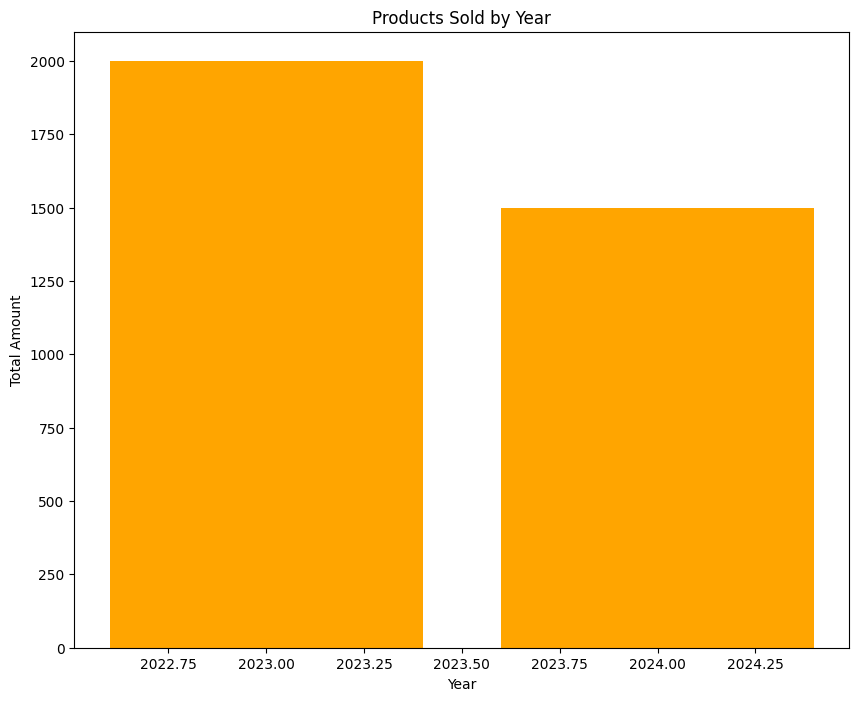

In [61]:
plt.subplots(figsize=(10,8))
plt.bar(x=sorted_df['Year'], height= sorted_df['Total Amount'], color='Orange')
plt.title('Products Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

In [62]:
sorted_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month_Abbr
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,2023,Jan
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,2023,Jan
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,2023,Jan
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,2023,Jan
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,2023,Dec
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500,2023,Dec
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,2023,Dec
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,2024,Jan


In [85]:
d = sorted_df.groupby(['Year', 'Product Category', 'Month_Abbr'])[ 'Quantity'].sum().reset_index() 
                                    # reset_index to convert groupsd results back to a DataFrame.
pd.set_option('display.max_rows', None)
d

,Year,Product Category,Month_Abbr,Quantity
0,2023,Beauty,Apr,69
1,2023,Beauty,Aug,62
2,2023,Beauty,Dec,62
3,2023,Beauty,Feb,68
4,2023,Beauty,Jan,59
5,2023,Beauty,Jul,70
6,2023,Beauty,Jun,66
7,2023,Beauty,Mar,51
8,2023,Beauty,May,65
9,2023,Beauty,Nov,63


C:\Users\star\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\star\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


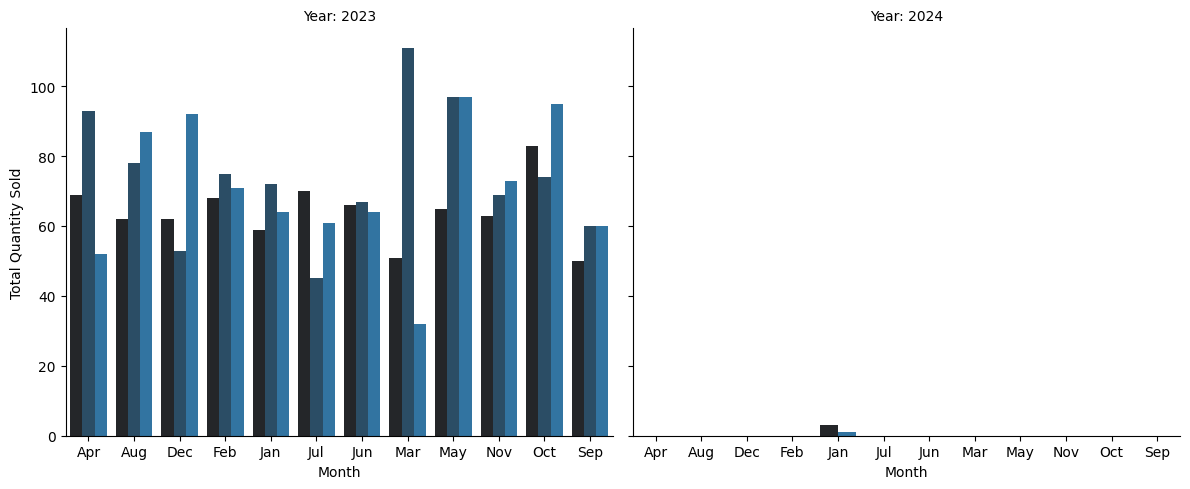

In [92]:
g = sns.FacetGrid(d, col="Year", height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x="Month_Abbr", y="Quantity", hue="Product Category")

# Formatting
g.set_axis_labels("Month", "Total Quantity Sold")
g.set_titles("Year: {col_name}")
plt.show()

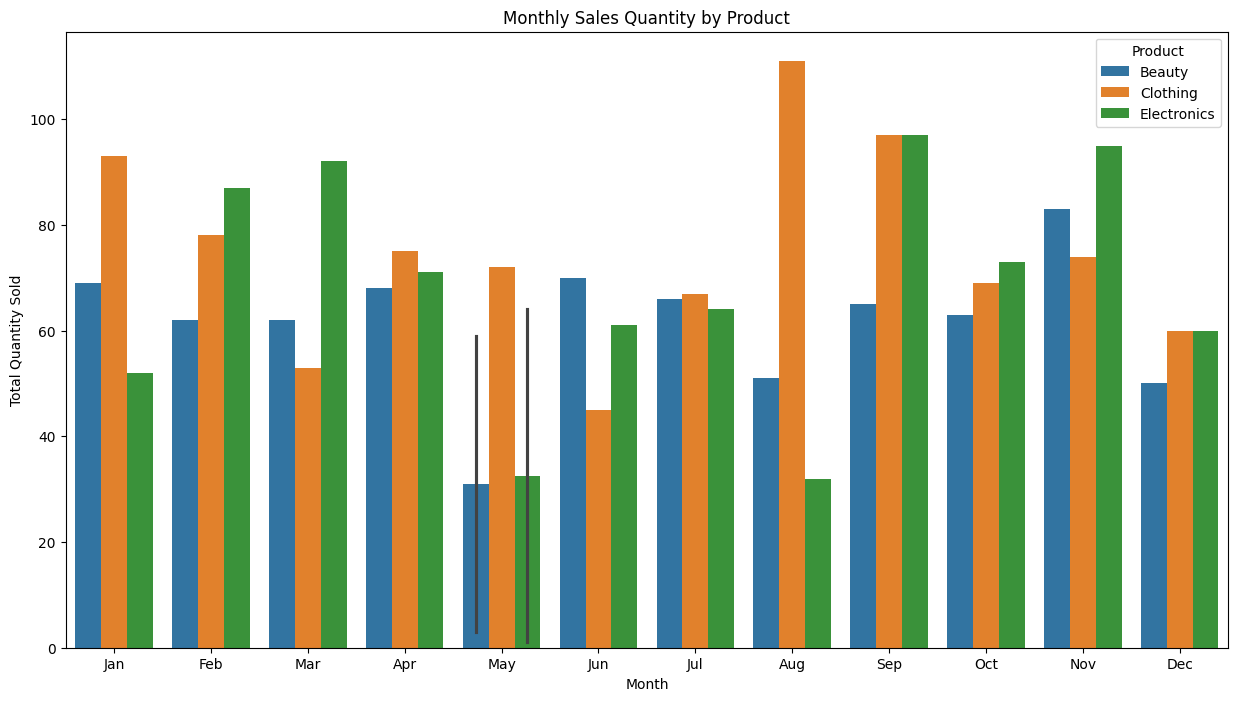

In [90]:
plt.figure(figsize=(15, 8))
sns.barplot(data=d, x='Month_Abbr', y='Quantity', hue='Product Category')

# Labels & Title
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.title("Monthly Sales Quantity by Product")
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.legend(title="Product")
plt.show()

In [94]:
c = sorted_df.groupby(['Year', 'Product Category', 'Month_Abbr'])['Total Amount'].sum().reset_index() 
                                    # reset_index to convert groupsd results back to a DataFrame.
c

,Year,Product Category,Month_Abbr,Total Amount
0,2023,Beauty,Apr,11905
1,2023,Beauty,Aug,9790
2,2023,Beauty,Dec,12400
3,2023,Beauty,Feb,14035
4,2023,Beauty,Jan,12430
5,2023,Beauty,Jul,16090
6,2023,Beauty,Jun,10995
7,2023,Beauty,Mar,10545
8,2023,Beauty,May,12450
9,2023,Beauty,Nov,9700


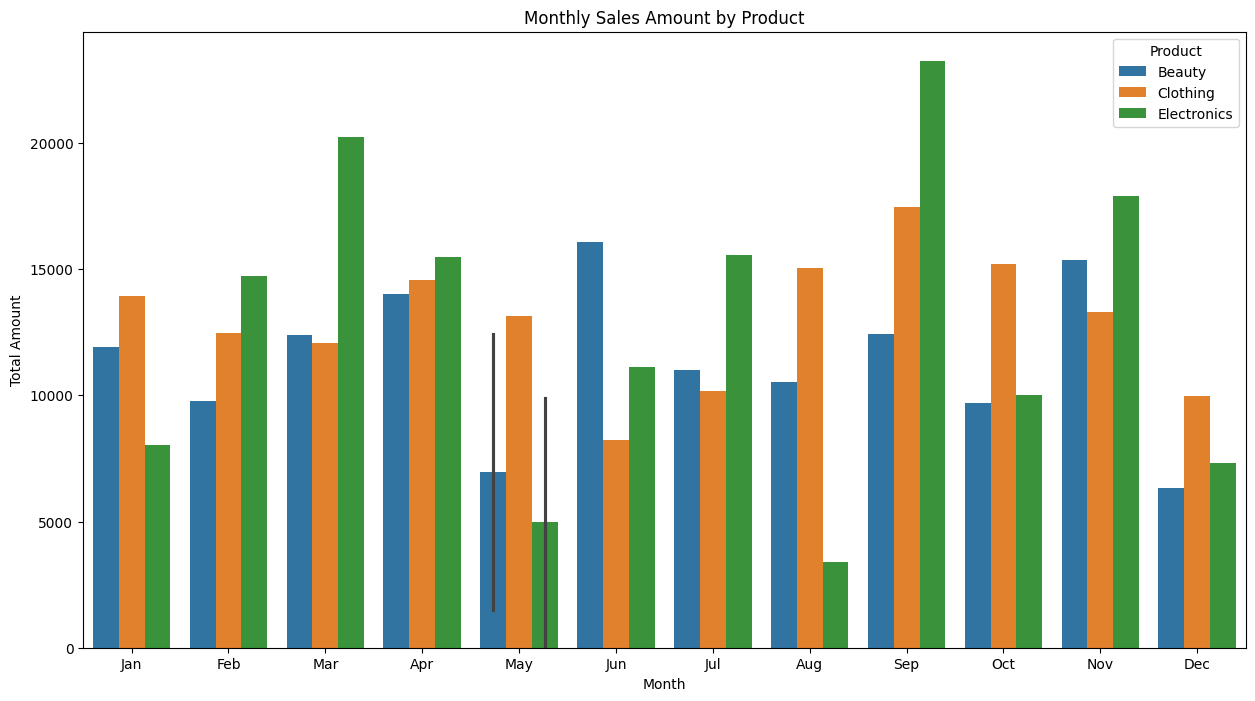

In [96]:
plt.figure(figsize=(15, 8))
sns.barplot(data=c, x='Month_Abbr', y='Total Amount', hue='Product Category')

# Labels & Title
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.title("Monthly Sales Amount by Product")
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.legend(title="Product")
plt.show()

#### Recommendations

i) The sold quantity of Beauty products are much lower than other two. So, increase the quality and advertising of beauty products.

ii) The salling occurenece of Clothing products is higher than other two but salling amount of Electronics products is high than others. So, that means electronics is a potential side for generating profit so engage clothing customers into potential one by providing quality in clothing services. 
So, then in future if they need to buy electronic they must come back and suggest to others.

iii) Increase the products in Electronics and provide more facilities as much as possible.

According to other perspectives, everything is going well, so I think we need a recommendation based on prediction unless something happens that helps the company increase its profit like increasing the amount and adding more different type of products.